In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [20]:
gold_data = pd.read_csv('FINAL_USO.csv')

In [6]:
gold_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
1713,2018-12-24,119.570000,120.139999,119.570000,120.019997,120.019997,9736400,239.039993,240.839996,234.270004,...,20.650000,21.090000,21.090000,60507000,9.49,9.52,9.28,9.29,9.29,21598200
1714,2018-12-26,120.620003,121.000000,119.570000,119.660004,119.660004,14293500,235.970001,246.179993,233.759995,...,20.530001,20.620001,20.620001,76365200,9.25,9.92,9.23,9.90,9.90,40978800
1715,2018-12-27,120.570000,120.900002,120.139999,120.570000,120.570000,11874400,242.570007,248.289993,238.960007,...,20.700001,20.969999,20.969999,52393000,9.59,9.65,9.37,9.62,9.62,36578700
1716,2018-12-28,120.800003,121.080002,120.720001,121.059998,121.059998,6864700,249.580002,251.399994,246.449997,...,20.570000,20.600000,20.600000,49835000,9.54,9.65,9.38,9.53,9.53,22803400
1717,2018-12-31,120.980003,121.260002,120.830002,121.250000,121.250000,8449400,249.559998,250.190002,247.470001,...,20.559999,21.090000,21.090000,53866600,9.63,9.71,9.44,9.66,9.66,28417400


In [7]:
gold_data.shape

(1718, 81)

In [8]:
gold_data.info

<bound method DataFrame.info of             Date        Open        High         Low       Close   Adj Close  \
0     2011-12-15  154.740005  154.949997  151.710007  152.330002  152.330002   
1     2011-12-16  154.309998  155.369995  153.899994  155.229996  155.229996   
2     2011-12-19  155.479996  155.860001  154.360001  154.869995  154.869995   
3     2011-12-20  156.820007  157.429993  156.580002  156.979996  156.979996   
4     2011-12-21  156.979996  157.529999  156.130005  157.160004  157.160004   
...          ...         ...         ...         ...         ...         ...   
1713  2018-12-24  119.570000  120.139999  119.570000  120.019997  120.019997   
1714  2018-12-26  120.620003  121.000000  119.570000  119.660004  119.660004   
1715  2018-12-27  120.570000  120.900002  120.139999  120.570000  120.570000   
1716  2018-12-28  120.800003  121.080002  120.720001  121.059998  121.059998   
1717  2018-12-31  120.980003  121.260002  120.830002  121.250000  121.250000   

       

In [9]:
gold_data.isnull().sum()

Date             0
Open             0
High             0
Low              0
Close            0
                ..
USO_High         0
USO_Low          0
USO_Close        0
USO_Adj Close    0
USO_Volume       0
Length: 81, dtype: int64

In [11]:
gold_data.describe()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,...,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03
mean,127.323434,127.854237,126.777695,127.319482,127.319482,8.446327e+06,204.490023,205.372637,203.487014,204.491222,...,26.384575,26.715012,25.924624,4.356515e+07,22.113417,22.307148,21.904657,22.109051,22.109051,1.922313e+07
std,17.526993,17.631189,17.396513,17.536269,17.536269,4.920731e+06,43.831928,43.974644,43.618940,43.776999,...,10.490908,10.603110,9.886570,2.909151e+07,11.431056,11.478671,11.373997,11.432787,11.432787,1.575743e+07
min,100.919998,100.989998,100.230003,100.500000,100.500000,1.501600e+06,122.059998,122.320000,120.029999,120.290001,...,12.400000,12.470000,12.269618,4.729000e+06,7.820000,8.030000,7.670000,7.960000,7.960000,1.035100e+06
25%,116.220001,116.540001,115.739998,116.052502,116.052502,5.412925e+06,170.392498,170.962506,169.577499,170.397500,...,20.355000,20.585000,20.180950,2.259968e+07,11.420000,11.500000,11.300000,11.392500,11.392500,6.229500e+06
50%,121.915001,122.325001,121.369999,121.795002,121.795002,7.483900e+06,205.464996,206.459999,204.430000,205.529999,...,22.870001,23.054999,22.677604,3.730465e+07,16.450000,16.635001,16.040000,16.345000,16.345000,1.613015e+07
75%,128.427494,129.087498,127.840001,128.470001,128.470001,1.020795e+07,237.292500,237.722500,236.147503,236.889996,...,26.797500,27.317500,26.478154,5.697055e+07,34.419998,34.667499,34.110000,34.417499,34.417499,2.672375e+07
max,173.199997,174.070007,172.919998,173.610001,173.610001,9.380420e+07,293.089996,293.940002,291.809998,293.579987,...,56.770000,57.470001,54.617039,2.321536e+08,41.599998,42.299999,41.299999,42.009998,42.009998,1.102657e+08


In [12]:
correlation = gold_data.corr()


<ipython-input-12-b9d572e5c3ef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

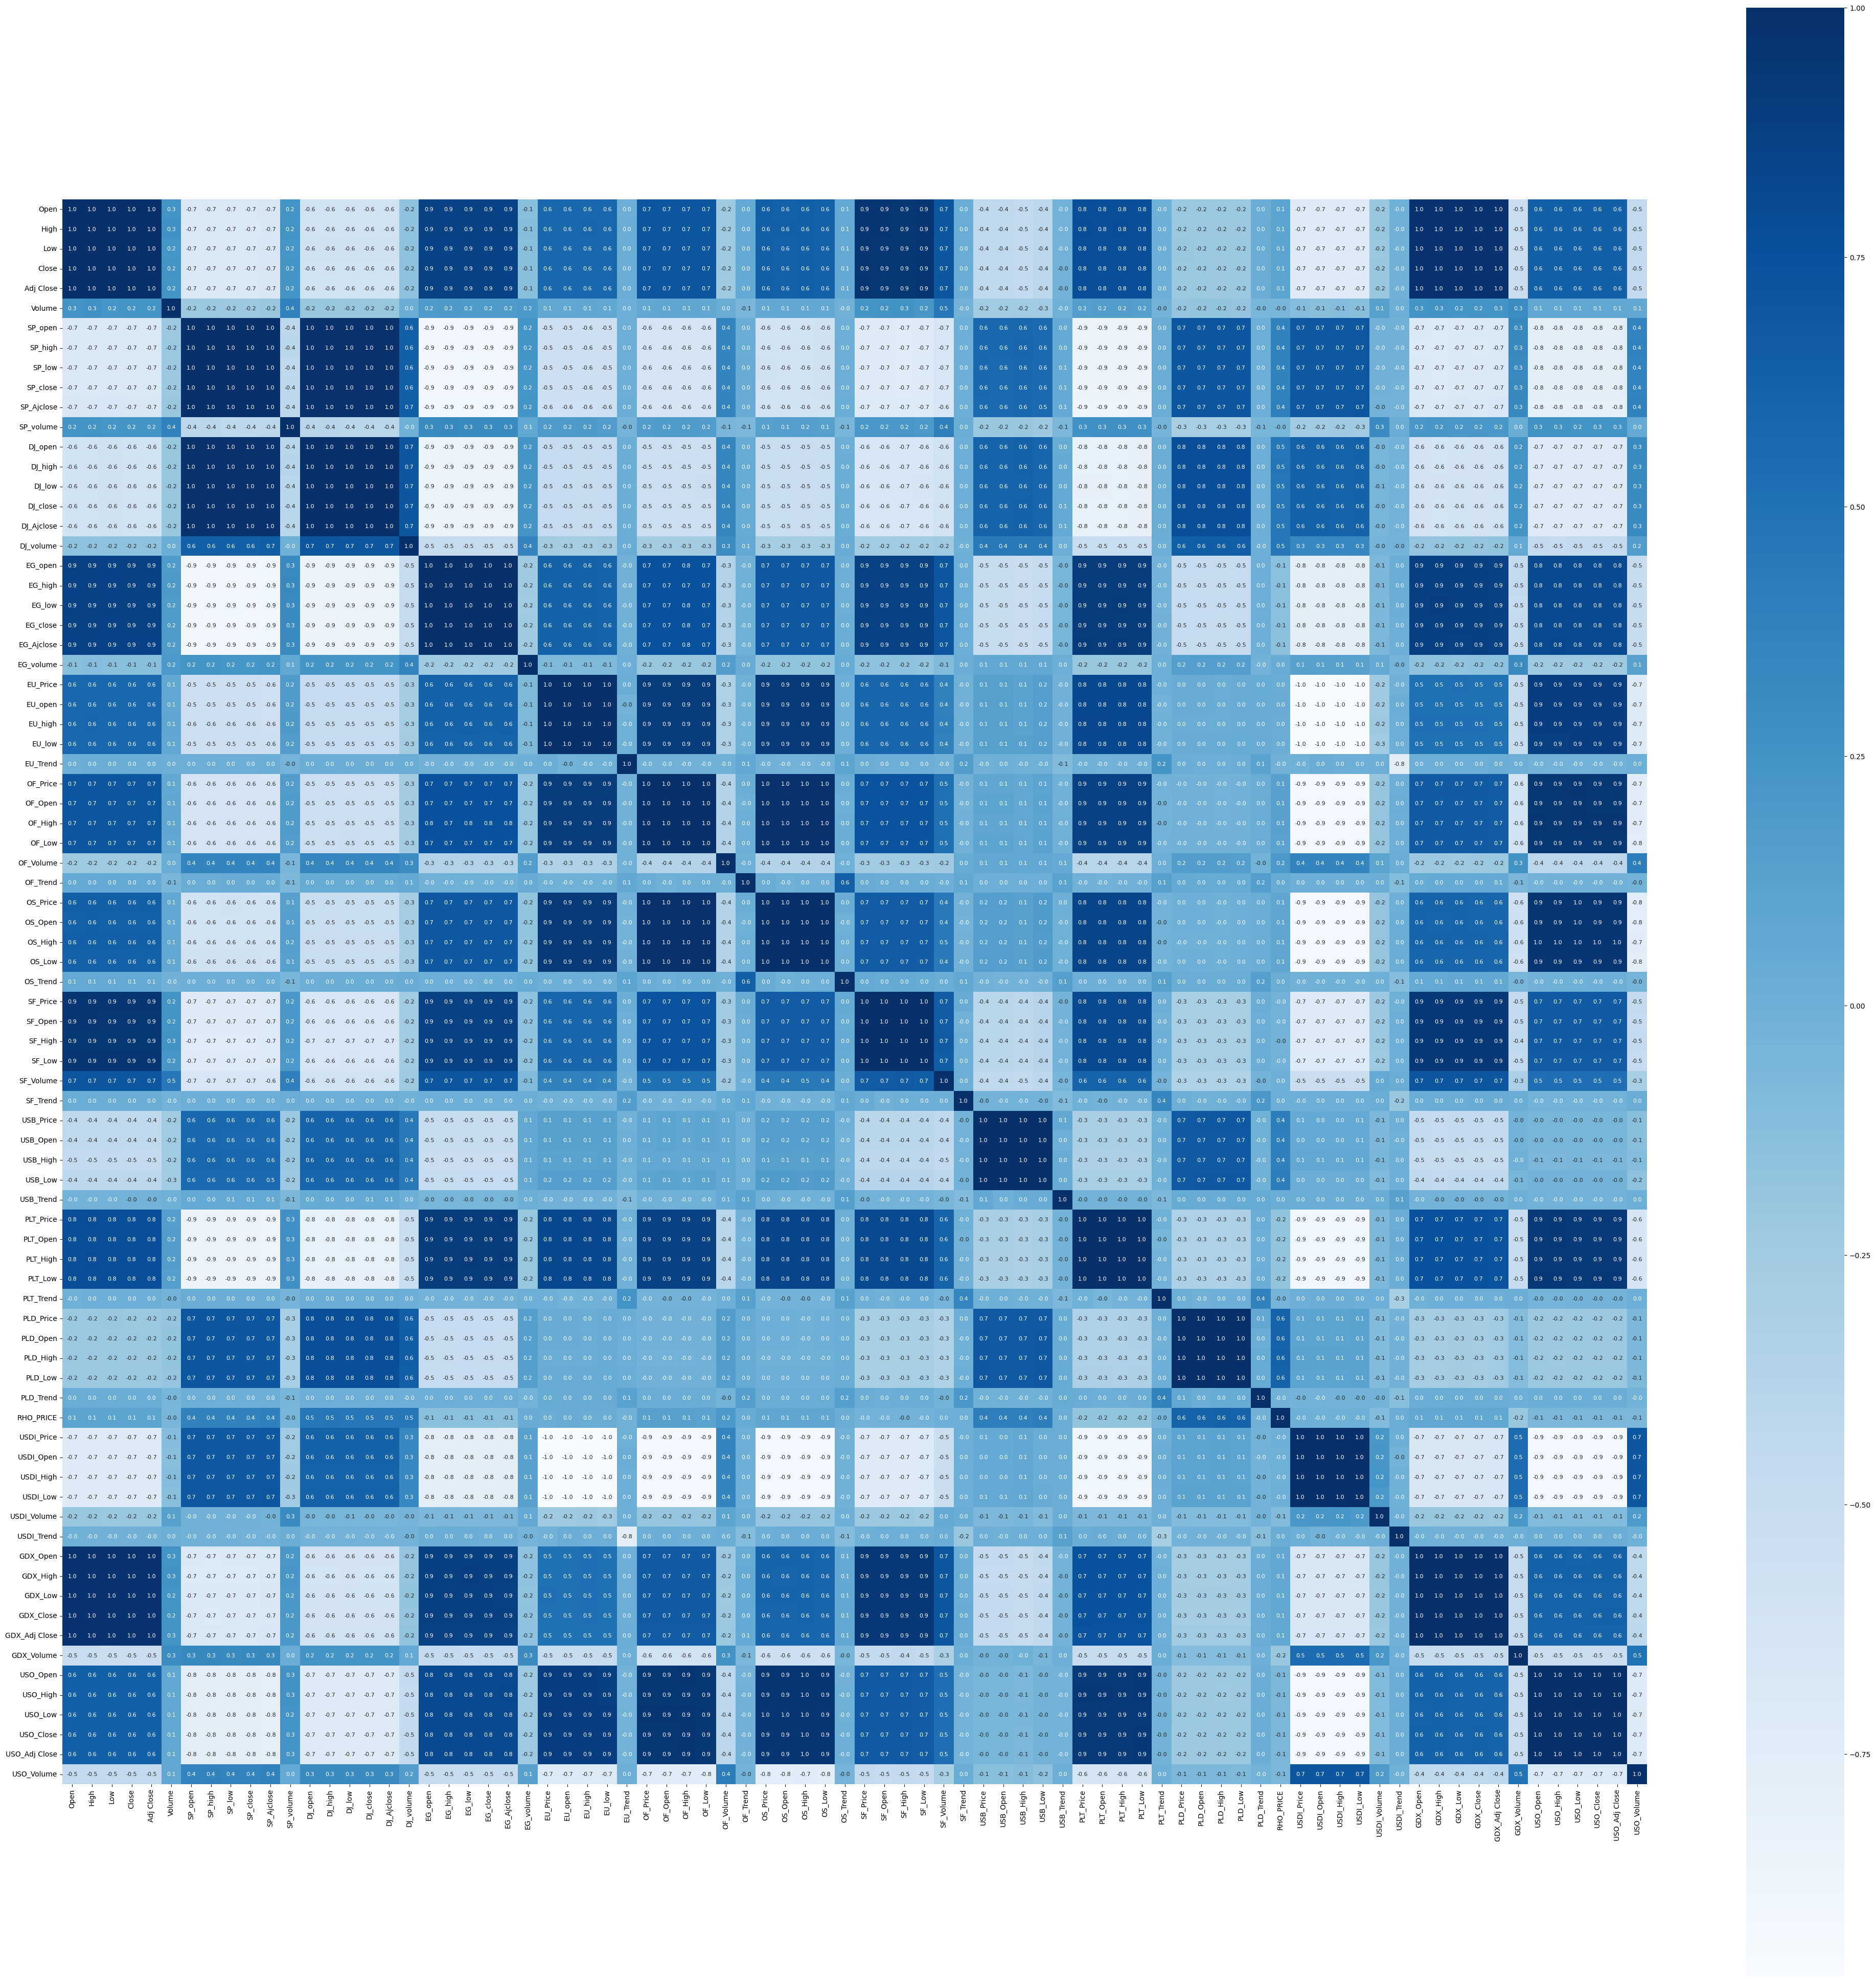

In [15]:
plt.figure(figsize = (50,50))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

<ipython-input-19-e198de768e89>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GDX_Adj Close'],color='green')


<Axes: xlabel='GDX_Adj Close', ylabel='Density'>

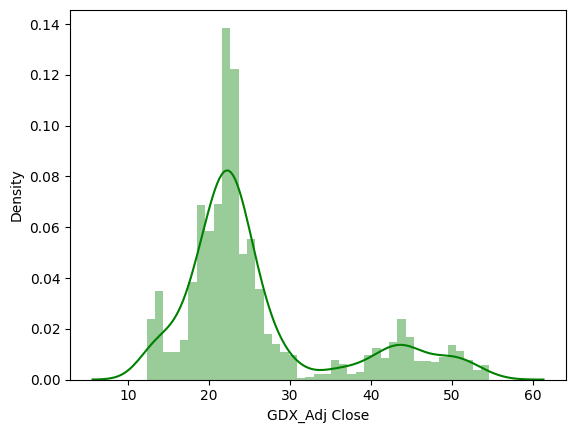

In [19]:
sns.distplot(gold_data['GDX_Adj Close'],color='green')

In [22]:
X = gold_data.drop(['Date','GDX_Adj Close'],axis=1)
Y = gold_data['GDX_Adj Close']

In [23]:
print(X)

            Open        High         Low       Close   Adj Close    Volume  \
0     154.740005  154.949997  151.710007  152.330002  152.330002  21521900   
1     154.309998  155.369995  153.899994  155.229996  155.229996  18124300   
2     155.479996  155.860001  154.360001  154.869995  154.869995  12547200   
3     156.820007  157.429993  156.580002  156.979996  156.979996   9136300   
4     156.979996  157.529999  156.130005  157.160004  157.160004  11996100   
...          ...         ...         ...         ...         ...       ...   
1713  119.570000  120.139999  119.570000  120.019997  120.019997   9736400   
1714  120.620003  121.000000  119.570000  119.660004  119.660004  14293500   
1715  120.570000  120.900002  120.139999  120.570000  120.570000  11874400   
1716  120.800003  121.080002  120.720001  121.059998  121.059998   6864700   
1717  120.980003  121.260002  120.830002  121.250000  121.250000   8449400   

         SP_open     SP_high      SP_low    SP_close  ...   GDX

In [24]:
print(Y)

0       48.973877
1       49.921513
2       48.490578
3       50.215282
4       50.186852
          ...    
1713    21.090000
1714    20.620001
1715    20.969999
1716    20.600000
1717    21.090000
Name: GDX_Adj Close, Length: 1718, dtype: float64


In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [26]:
regressor = RandomForestRegressor(n_estimators=100)

In [27]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [28]:
test_data_prediction = regressor.predict(X_test)

In [29]:
print(test_data_prediction)

[18.84209567 22.52623446 22.647085   16.30844012 13.12678236 21.69027757
 23.61833756 25.8893406  26.21635119 21.47443444 25.58163546 18.43922342
 20.21134923 21.23170273 49.05767842 21.06881452 21.37605821 21.25276699
 22.59789116 22.32431925 40.51312191 22.87762212 39.67328434 23.28217002
 29.05013654 44.38418022 41.80267068 25.57630608 20.05500462 20.38901791
 23.44343688 20.91798746 13.51409232 20.35776226 22.43256802 22.62329586
 38.23843481 21.91163157 18.70192149 42.84471038 22.05293055 21.34734192
 22.75044458 19.2485488  21.63113014 23.11225888 44.57336714 21.73499866
 18.45008504 29.25037593 18.26040943 23.12186821 25.75118473 23.40768077
 23.29081936 39.99634199 21.64030358 26.22937616 22.27323797 23.46721687
 43.33561747 43.78012549 26.20029897 13.76134772 16.67351446 43.29295601
 44.58020616 17.73572107 22.53196633 22.9824132  19.29918472 14.5120875
 26.12752687 13.41815018 17.42965317 44.22291    29.40866392 20.38996387
 15.4446602  49.21737573 24.79806979 22.24309057 21.

In [30]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9998104371404197


In [31]:
Y_test = list(Y_test)

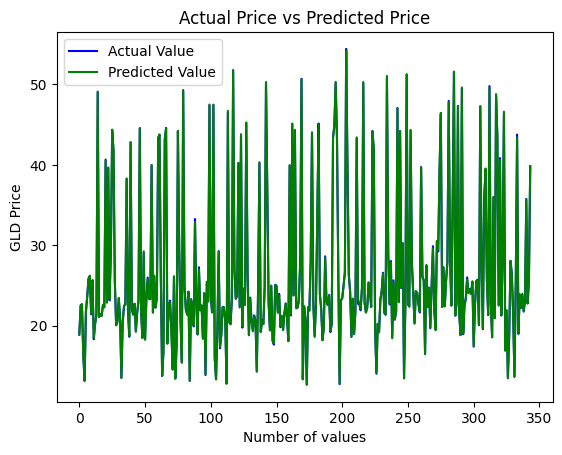

In [32]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()